In [ ]:
!pip install torch torchvision
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-h2mipi0x
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-h2mipi0x
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 2ebcd001b0ed9dac9645ed54c35def2bba3ddbd2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-wtzr_1bn/groundingdino_eb104f71b801425cbf87d88b0138bd43
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-wtzr_1bn/groundingdino_eb104f71b801425cbf87d88b0138bd43
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 60d796825e1266e56f7e4e9e00e88de662b67bd3
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [ ]:

from PIL import Image
import numpy as np  # Import the NumPy library

from lang_sam import LangSAM
from lang_sam.utils import draw_image

model = LangSAM()





/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:11<00:00, 224MB/s]


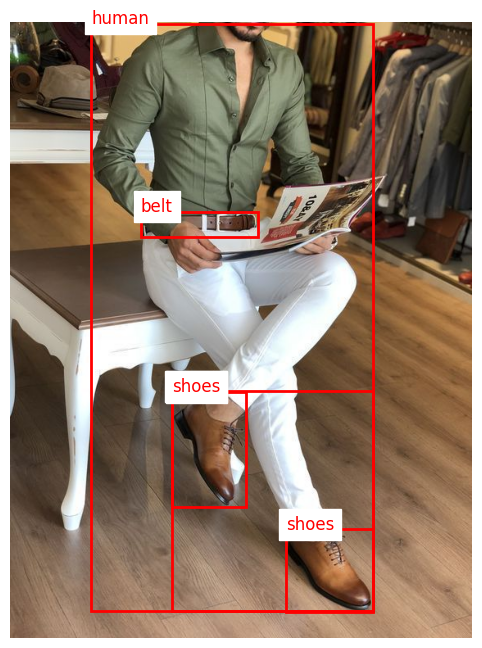

Detected object: shoes, Matching Score: 0.50
Average Color (BGR): [ 79.07509434 103.21792453 137.48764151]
Detected object: shoes, Matching Score: 0.48
Average Color (BGR): [ 72.45626984  87.94714286 110.0352381 ]
Detected object: human, Matching Score: 0.44
Average Color (BGR): [103.59714249 119.90648211 132.29064902]
Detected object: shoes, Matching Score: 0.33
Average Color (BGR): [ 99.68230028 116.43186405 137.61109172]
Detected object: belt, Matching Score: 0.49
Average Color (BGR): [ 94.24971802 107.86983984 120.50078953]


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
# Load the image from file
image_pil = Image.open('/content/drive/MyDrive/Grid1/imagee.jpg').convert("RGB")

text_prompt = 'shoes, belt, human'
masks, boxes, labels, logits = model.predict(image_pil, text_prompt)

# Convert PIL Image to NumPy array
image_np = np.array(image_pil)

# Display the image using matplotlib with the segmentation overlay
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_np)

# Loop through the segmentation results and draw bounding boxes
for mask, box, label in zip(masks, boxes, labels):
    rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red', linewidth=2)
    ax.add_patch(rect)
    ax.text(box[0], box[1], label, color='red', backgroundcolor='white', fontsize=12)

plt.axis('off')
plt.show()

# Create a directory to save the cropped images
save_dir = '/content/drive/MyDrive/Grid1/cropped_images/'
os.makedirs(save_dir, exist_ok=True)

# Loop through the segmentation results and save cropped images
for idx, (mask, box, label, logits_value) in enumerate(zip(masks, boxes, labels, logits)):
    # Convert box coordinates to integers
    box = [int(coord) for coord in box]

    # Crop the image based on the bounding box coordinates
    cropped_image = image_np[box[1]:box[3], box[0]:box[2]]

    # Convert NumPy array to PIL Image
    cropped_pil = Image.fromarray(cropped_image)

    # Perform color detection on the cropped image
    # Convert the cropped image to OpenCV format (BGR)
    cropped_cv = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    # Calculate the average color of the object
    average_color = cropped_cv.mean(axis=0).mean(axis=0)

    # Create a filename based on the label, matching score, and index
    filename = f'{label}_score_{logits_value:.2f}_color_{average_color[2]:.0f}_{average_color[1]:.0f}_{average_color[0]:.0f}_{idx}.jpg'

    # Save the cropped image to the specified directory
    cropped_pil.save(os.path.join(save_dir, filename))

    # Print the detected object, matching score, and average color
    print(f"Detected object: {label}, Matching Score: {logits_value:.2f}")
    print(f"Average Color (BGR): {average_color}")



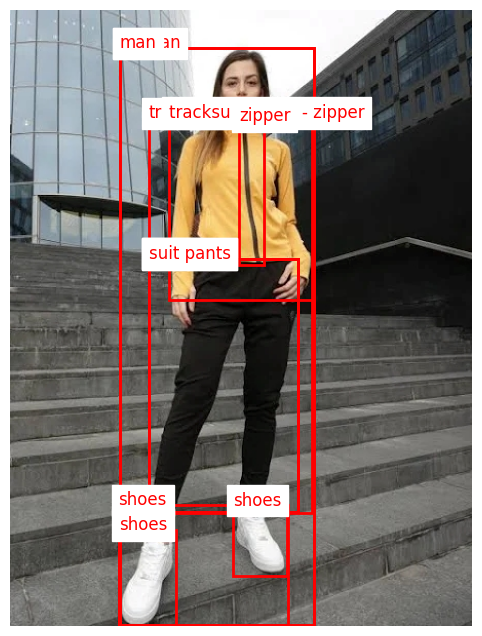

Detected object: woman, Matching Score: 0.57
Average Color (BGR): [ 97.33193056 111.10650737 118.79883824]
Detected object: pants, Matching Score: 0.58
Average Color (BGR): [56.7380345  63.13160668 66.65462259]
Detected object: shoes, Matching Score: 0.49
Average Color (BGR): [159.31872172 162.67618778 164.03223982]
Detected object: shoes, Matching Score: 0.42
Average Color (BGR): [120.76140896 125.01781922 126.61036001]
Detected object: suit pants, Matching Score: 0.49
Average Color (BGR): [56.7380345  63.13160668 66.65462259]
Detected object: shoes, Matching Score: 0.51
Average Color (BGR): [157.26478495 160.43721198 162.27380952]
Detected object: tracksuit, Matching Score: 0.38
Average Color (BGR): [ 69.84908928  91.64748836 104.47630483]
Detected object: tracksuit jacket - zipper, Matching Score: 0.38
Average Color (BGR): [ 79.06829856 127.73936597 158.81308186]
Detected object: zipper, Matching Score: 0.38
Average Color (BGR): [ 91.55407801 160.37736407 201.72665485]
Detected obje

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Load the image from file
image_pil = Image.open('/content/drive/MyDrive/Grid1/sports.jpg').convert("RGB")

text_prompt = 'shoes, man, woman, pants, Tracksuit, suit pants, jacket-zipper'
masks, boxes, labels, logits = model.predict(image_pil, text_prompt)

# Convert PIL Image to NumPy array
image_np = np.array(image_pil)

# Display the image using matplotlib with the segmentation overlay
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_np)

# Loop through the segmentation results and draw bounding boxes
for mask, box, label in zip(masks, boxes, labels):
    rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red', linewidth=2)
    ax.add_patch(rect)
    ax.text(box[0], box[1], label, color='red', backgroundcolor='white', fontsize=12)

plt.axis('off')
plt.show()

# Create a directory to save the cropped images
save_dir = '/content/drive/MyDrive/Grid1/cropped_images/'
os.makedirs(save_dir, exist_ok=True)

# Loop through the segmentation results and save cropped images
for idx, (mask, box, label, logits_value) in enumerate(zip(masks, boxes, labels, logits)):
    # Convert box coordinates to integers
    box = [int(coord) for coord in box]

    # Crop the image based on the bounding box coordinates
    cropped_image = image_np[box[1]:box[3], box[0]:box[2]]

    # Convert NumPy array to PIL Image
    cropped_pil = Image.fromarray(cropped_image)

    # Perform color detection on the cropped image
    # Convert the cropped image to OpenCV format (BGR)
    cropped_cv = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    # Calculate the average color of the object
    average_color = cropped_cv.mean(axis=0).mean(axis=0)

    # Create a filename based on the label, matching score, and index
    filename = f'{label}_score_{logits_value:.2f}_color_{average_color[2]:.0f}_{average_color[1]:.0f}_{average_color[0]:.0f}_{idx}.jpg'

    # Save the cropped image to the specified directory
    cropped_pil.save(os.path.join(save_dir, filename))

    # Print the detected object, matching score, and average color
    print(f"Detected object: {label}, Matching Score: {logits_value:.2f}")
    print(f"Average Color (BGR): {average_color}")



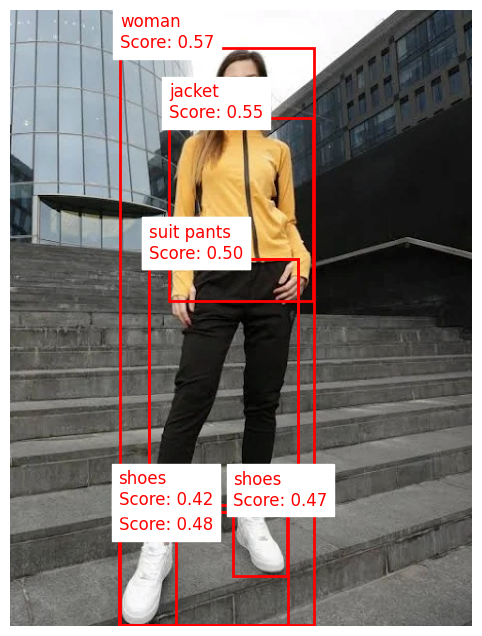

Detected object: woman, Matching Score: 0.57
Average Color (BGR): [ 97.33193056 111.10650737 118.79883824]
Detected object: shoes, Matching Score: 0.48
Average Color (BGR): [157.26478495 160.43721198 162.27380952]
Detected object: pants, Matching Score: 0.58
Average Color (BGR): [56.49163758 62.84838755 66.34708921]
Detected object: shoes, Matching Score: 0.42
Average Color (BGR): [120.76140896 125.01781922 126.61036001]
Detected object: shoes, Matching Score: 0.47
Average Color (BGR): [159.31872172 162.67618778 164.03223982]
Detected object: suit pants, Matching Score: 0.50
Average Color (BGR): [56.7380345  63.13160668 66.65462259]
Detected object: jacket, Matching Score: 0.55
Average Color (BGR): [ 79.06829856 127.73936597 158.81308186]


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Load the image from file
image_pil = Image.open('/content/drive/MyDrive/Grid1/sports.jpg').convert("RGB")

text_prompt = 'shoes, man, woman, pants, Tracksuit, suit pants, jacket-zipper, jacket'
masks, boxes, labels, logits = model.predict(image_pil, text_prompt)

# Convert PIL Image to NumPy array
image_np = np.array(image_pil)

# Display the image using matplotlib with the segmentation overlay
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_np)

# Loop through the segmentation results and draw bounding boxes
for mask, box, label, logits_value in zip(masks, boxes, labels, logits):
    if logits_value > 0.4:  # Set the threshold for matching score
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(box[0], box[1], f'{label}\nScore: {logits_value:.2f}', color='red', backgroundcolor='white', fontsize=12)

plt.axis('off')
plt.show()

# Create a directory to save the cropped images
save_dir = '/content/drive/MyDrive/Grid1/cropped_images/'
os.makedirs(save_dir, exist_ok=True)

# Loop through the segmentation results and save cropped images
for idx, (mask, box, label, logits_value) in enumerate(zip(masks, boxes, labels, logits)):
    if logits_value > 0.4:  # Set the threshold for matching score
        # Convert box coordinates to integers
        box = [int(coord) for coord in box]

        # Crop the image based on the bounding box coordinates
        cropped_image = image_np[box[1]:box[3], box[0]:box[2]]

        # Convert NumPy array to PIL Image
        cropped_pil = Image.fromarray(cropped_image)

        # Perform color detection on the cropped image
        # Convert the cropped image to OpenCV format (BGR)
        cropped_cv = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
        # Calculate the average color of the object
        average_color = cropped_cv.mean(axis=0).mean(axis=0)

        # Create a filename based on the label, matching score, and index
        filename = f'{label}_score_{logits_value:.2f}_color_{average_color[2]:.0f}_{average_color[1]:.0f}_{average_color[0]:.0f}_{idx}.jpg'

        # Save the cropped image to the specified directory
        cropped_pil.save(os.path.join(save_dir, filename))

        # Print the detected object, matching score, and average color
        print(f"Detected object: {label}, Matching Score: {logits_value:.2f}")
        print(f"Average Color (BGR): {average_color}")


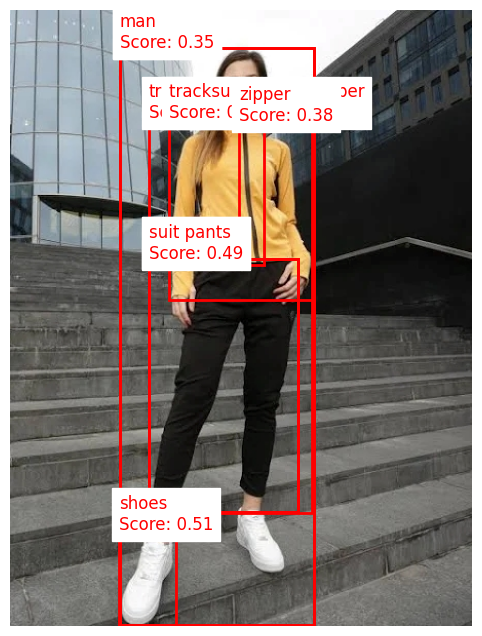

Detected object: woman, Matching Score: 0.57
Average Color (BGR): [ 97.33193056 111.10650737 118.79883824]
Detected object: pants, Matching Score: 0.58
Average Color (BGR): [56.7380345  63.13160668 66.65462259]
Detected object: suit pants, Matching Score: 0.49
Average Color (BGR): [56.7380345  63.13160668 66.65462259]
Detected object: shoes, Matching Score: 0.51
Average Color (BGR): [157.26478495 160.43721198 162.27380952]


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Load the image from file
image_pil = Image.open('/content/drive/MyDrive/Grid1/sports.jpg').convert("RGB")

text_prompt = 'shoes, man, woman, pants, Tracksuit, suit pants, jacket-zipper'
masks, boxes, labels, logits = model.predict(image_pil, text_prompt)

# Convert PIL Image to NumPy array
image_np = np.array(image_pil)

# Display the image using matplotlib with the segmentation overlay
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_np)

# Create a dictionary to store the highest matching score for each label
highest_scores = {}

# Loop through the segmentation results and draw bounding boxes
for mask, box, label, logits_value in zip(masks, boxes, labels, logits):
    if label in highest_scores:
        if logits_value > highest_scores[label]:
            highest_scores[label] = logits_value
    else:
        highest_scores[label] = logits_value

# Loop through the segmentation results and draw bounding boxes for objects with highest scores
for mask, box, label, logits_value in zip(masks, boxes, labels, logits):
    if logits_value > 0.2 and logits_value == highest_scores[label]:  # Set the threshold for matching score
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(box[0], box[1], f'{label}\nScore: {logits_value:.2f}', color='red', backgroundcolor='white', fontsize=12)

plt.axis('off')
plt.show()

# Create a directory to save the cropped images
save_dir = '/content/drive/MyDrive/Grid1/cropped_images/'
os.makedirs(save_dir, exist_ok=True)

# Loop through the segmentation results and save cropped images for objects with highest scores
for idx, (mask, box, label, logits_value) in enumerate(zip(masks, boxes, labels, logits)):
    if logits_value > 0.4 and logits_value == highest_scores[label]:  # Set the threshold for matching score
        # Convert box coordinates to integers
        box = [int(coord) for coord in box]

        # Crop the image based on the bounding box coordinates
        cropped_image = image_np[box[1]:box[3], box[0]:box[2]]

        # Convert NumPy array to PIL Image
        cropped_pil = Image.fromarray(cropped_image)

        # Perform color detection on the cropped image
        # Convert the cropped image to OpenCV format (BGR)
        cropped_cv = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
        # Calculate the average color of the object
        average_color = cropped_cv.mean(axis=0).mean(axis=0)

        # Create a filename based on the label, matching score, and index
        filename = f'{label}_score_{logits_value:.2f}_color_{average_color[2]:.0f}_{average_color[1]:.0f}_{average_color[0]:.0f}_{idx}.jpg'

        # Save the cropped image to the specified directory
        cropped_pil.save(os.path.join(save_dir, filename))

        # Print the detected object, matching score, and average color
        print(f"Detected object: {label}, Matching Score: {logits_value:.2f}")
        print(f"Average Color (BGR): {average_color}")
